# __Predicting Arabic Handwritten Digits with Simple Convolutional Layers__
#### _Any advice is appreciated!_

# **Import libraries:**

In [2]:
!pip install keras tensorflow

In [3]:
from __future__ import division, print_function, absolute_import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.models import load_model
import cv2
from PIL import Image

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


from keras.models import load_model
from keras.applications import imagenet_utils
import argparse

from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [4]:
# read training & testing data

trainImg = pd.read_csv("csvTrainImages 60k x 784.csv",header=None)
trainLabel = pd.read_csv("csvTrainLabel 60k x 1.csv",header=None)

testImg = pd.read_csv("csvTestImages 10k x 784.csv",header=None)
testLabel = pd.read_csv("csvTestLabel 10k x 1.csv",header=None)

In [5]:
trainImg.head()


0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

In [6]:
testImg.head()


0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]

In [7]:

# Split data into training set and validation set
#training images
trainImg = trainImg.values.astype('float32') /255.0
#training labels
trainLabel = trainLabel.values.astype('int32')

#testing images
testImg = testImg.values.astype('float32') /255.0
#testing labels

In [8]:
testImg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#One Hot encoding of train labels.
trainLabel = to_categorical(trainLabel,10)

#One Hot encoding of test labels.
testLabel = to_categorical(testLabel,10)

In [10]:
trainLabel[0]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
print(trainImg.shape, trainLabel.shape, testImg.shape, testLabel.shape)


(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [12]:
# reshape input images to 28x28x1
trainImg = trainImg.reshape([-1, 28, 28, 1])
testImg = testImg.reshape([-1, 28, 28, 1])

In [13]:
print(trainImg.shape, trainLabel.shape, testImg.shape, testLabel.shape)


(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [14]:
trainImg[0]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [15]:

# Building convolutional network
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(28,28,1), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='tanh'))

model.add(layers.Dense(units=84, activation='tanh'))

model.add(layers.Dense(units=10, activation='softmax'))


In [16]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
model.fit(trainImg, trainLabel,
          batch_size=100, epochs=10, verbose=1)

Epoch 1/10
600/600 [==============================] - 42s 68ms/step - loss: 2.2908 - accuracy: 0.0894
Epoch 2/10
600/600 [==============================] - 44s 74ms/step - loss: 2.2036 - accuracy: 0.1693
Epoch 3/10
600/600 [==============================] - 39s 65ms/step - loss: 2.1216 - accuracy: 0.2830
Epoch 4/10
600/600 [==============================] - 41s 68ms/step - loss: 2.0380 - accuracy: 0.4167
Epoch 5/10
600/600 [==============================] - 44s 73ms/step - loss: 1.9515 - accuracy: 0.5624
Epoch 6/10
600/600 [==============================] - 42s 71ms/step - loss: 1.8597 - accuracy: 0.6816
Epoch 7/10
600/600 [==============================] - 40s 66ms/step - loss: 1.7624 - accuracy: 0.7533
Epoch 8/10
600/600 [==============================] - 40s 67ms/step - loss: 1.6583 - accuracy: 0.8004
Epoch 9/10
600/600 [==============================] - 40s 67ms/step - loss: 1.5505 - accuracy: 0.8235
Epoch 10/10
600/600 [==============================] - 41s 69ms/step - loss: 1.442

In [18]:
print('Predict the classes: ')
prediction_probs = model.predict(trainImg)
prediction = np.argmax(prediction_probs, axis=1)
print('Predicted classes: ', prediction)

Predict the classes: 
1875/1875 [==============================] - 21s 11ms/step
Predicted classes:  [0 1 1 ... 3 8 9]


In [19]:
score = model.evaluate(testImg, testLabel,verbose=0)
print('Loss accuracy: %2f%%' % (score[0] * 100))
print('Test accuarcy: %2f%%' % (score[1] * 100))
print(model.metrics_names)

Loss accuracy: 141.868258%
Test accuarcy: 85.250002%
['loss', 'accuracy']


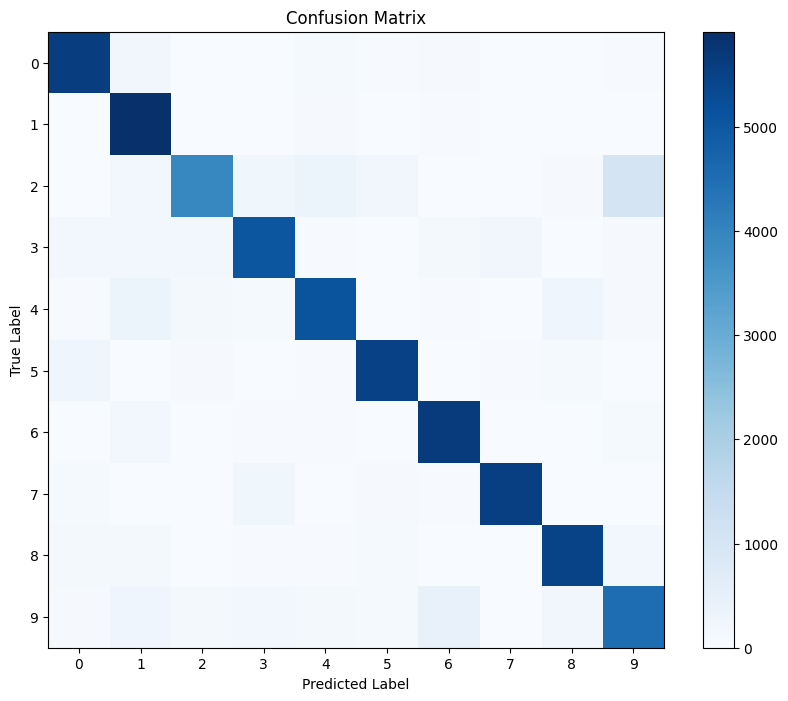

In [20]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(trainLabel, axis=1), prediction)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
model.save('Lenet-5')

313/313 [==============================] - 3s 9ms/step


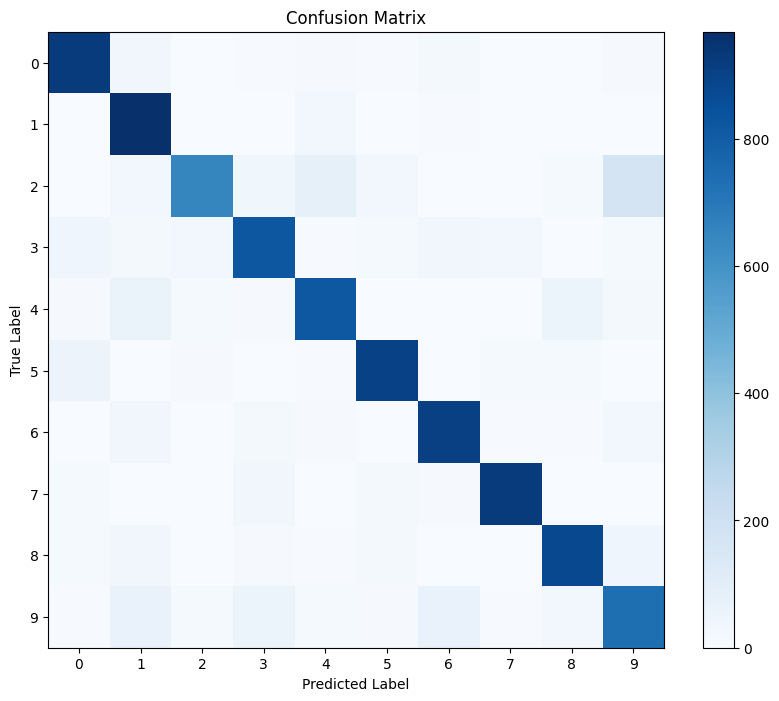

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1000
           1       0.78      0.97      0.86      1000
           2       0.90      0.65      0.76      1000
           3       0.84      0.82      0.83      1000
           4       0.84      0.82      0.83      1000
           5       0.91      0.90      0.91      1000
           6       0.87      0.91      0.89      1000
           7       0.95      0.92      0.94      1000
           8       0.88      0.88      0.88      1000
           9       0.72      0.74      0.73      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [22]:
# Predict the probabilities for each class
probabilities = model.predict(testImg)

# Convert probabilities to predicted classes
prediction = np.argmax(probabilities, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(testLabel, axis=1), prediction)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute classification report
report = classification_report(np.argmax(testLabel, axis=1), prediction)
print(report)